# Embedding multiple pretrained models into an architecture

Idea is to create an architecture as below - 

<img src="architecture.png" style="width: 400px;"/>

In [1]:
from tensorflow.keras import layers, Model, utils

In [2]:
#Creating a dummy model with a generator

def model_generator():
    inp = layers.Input((3,))
    x = layers.Dense(4, activation='relu')(inp)
    out = layers.Dense(2, activation='softmax')(x)    
    model = Model(inp, out)
    return model

In [3]:
#Lets assume we have 3 models which are loaded from Binary files

pretrained_model1 = model_generator()
pretrained_model2 = model_generator()
pretrained_model3 = model_generator()

#NOTE: Even if its the same pre-trained model that needs 
#to be embedded 3 times, ensure to instantiate it 3 times
#since the final model will end up pointing to the same 
#set of weights in the pre-trained model otherwise

In [4]:
#Custom model architecture that embeds the 3 pre-trained models

inp = layers.Input((9,))

x0 = layers.Lambda(lambda x : x[:,0:3])(inp)  #(none, 3)
x1 = layers.Lambda(lambda x : x[:,3:6])(inp)  #(none, 3)
x2 = layers.Lambda(lambda x : x[:,6:])(inp)   #(none, 3)

m0 = pretrained_model1(x0)
m1 = pretrained_model2(x1)
m2 = pretrained_model3(x2)

cnc = layers.concatenate([m0, m1, m2])
out = layers.Dense(2, activation='softmax')(cnc)

model = Model(inp,out, name='custom')

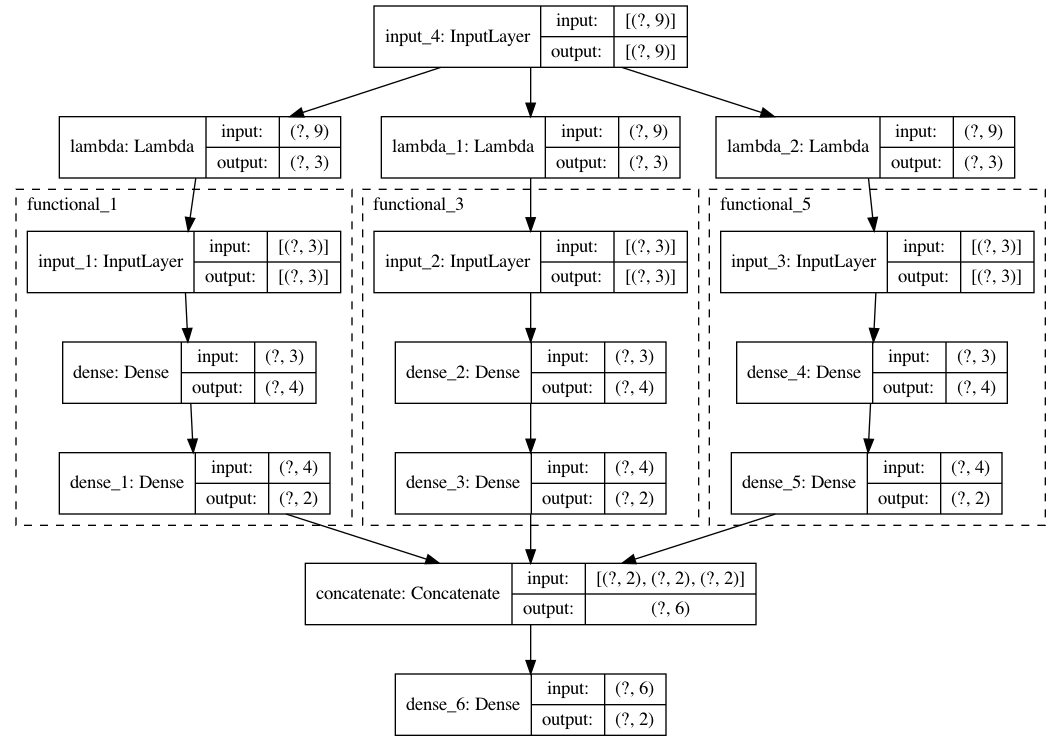

In [5]:
utils.plot_model(model, show_shapes=True, expand_nested=True)

In [6]:
model.summary()

Model: "custom"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 9)]          0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 3)            0           input_4[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 3)            0           input_4[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 3)            0           input_4[0][0]                    
_____________________________________________________________________________________________

In [7]:
# Setting the pre-trained / embedded models to not be trainable

In [8]:
model.layers[4].trainable = False
model.layers[5].trainable = False
model.layers[6].trainable = False

In [9]:
for i in model.layers:
    print(i.name, '->', i.trainable)

input_4 -> True
lambda -> True
lambda_1 -> True
lambda_2 -> True
functional_1 -> False
functional_3 -> False
functional_5 -> False
concatenate -> True
dense_6 -> True


In [10]:
# Setting weights directly for the pre-trained / embedded models

In [11]:
model.layers[4].set_weights(pretrained_model1.get_weights())
model.layers[5].set_weights(pretrained_model1.get_weights())
model.layers[6].set_weights(pretrained_model1.get_weights())